# ANALYSIS AND INSIGHTS

We come to the most important part, where we are going to try to obtain relevant conclusions for the objective using all the preparation work we have done, the Business Analytics techniques that we already know and also we are going to learn how to create a map visualization.

To do this, we will begin by answering the seed questions and it is likely that in the process interesting findings will emerge that lead us to new questions or the application of certain techniques.

## SET UP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

#Automcomplete
%config IPCompleter.greedy=True

pd.options.display.max_columns = None

## IMPORT DATA

In [2]:
con = sa.create_engine('sqlite:///../Datos/airbnb.db')

df = pd.read_sql('df_prepared', con = con)

df.head()

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2,district,total_price,ocupation,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,purchase_price,poi_sol
0,0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,2,180,Excellent connection with the AIRPORT and EXHI...,t,2,1.0,1.0,80,4.87,4.89,4.77,5098,Chamartín,60.0,50,01_One,0-3,1,48-744,50,178430.0,5.032039
1,1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,2,364,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,33,4.58,4.82,4.21,2267,Latina,31.0,0,01_One,0-3,1,5-48,50,79345.0,3.521406
2,2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,5,222,"Apartamento de tres dormitorios dobles, gran s...",f,6,3.0,5.0,0,NaN,NaN,NaN,4085,Arganzuela,50.0,39,03_Three,5-16,3-24,1-4,90,257355.0,3.226963
3,3,3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,1,115,"Studio located 50 meters from Gran Via, next t...",f,3,1.0,1.0,12,4.92,5.00,5.00,4827,Centro,92.0,68,01_One,0-3,1,5-48,50,168945.0,0.591065
4,4,4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,1,349,Nice and cozy roon for one person with a priva...,f,1,1.0,1.0,149,4.68,4.71,4.70,4085,Arganzuela,26.0,4,01_One,0-3,1,48-744,50,142975.0,3.200942


## ANALYSIS

### Price Analysis

**What is the average price? And the price range? And by districts? And by neighborhoods?**

**What is the ranking of districts and neighborhoods by average rental price?**

In [3]:
df.total_price.describe()

count    17710.000000
mean       149.027770
std        523.211567
min         20.000000
25%         43.000000
50%         70.000000
75%        112.000000
max      22400.000000
Name: total_price, dtype: float64

We see that there is at least one outlier on the upper part that skews the mean, so we are going to use the median as a more reliable measure of centralization.

In [4]:
df.total_price.median()

70.0

In [5]:
df.groupby('district').total_price.median().sort_values(ascending = False)

district
San Blas - Canillejas    90.0
Salamanca                88.0
Centro                   76.0
Chamartín                74.0
Chamberí                 70.0
Hortaleza                69.0
Retiro                   68.0
Tetuán                   66.0
Moncloa - Aravaca        61.0
Fuencarral - El Pardo    60.0
Arganzuela               58.0
Vicálvaro                53.0
Ciudad Lineal            50.0
Barajas                  49.5
Carabanchel              48.0
Villa de Vallecas        47.5
Latina                   47.0
Usera                    42.0
Villaverde               42.0
Moratalaz                40.0
Puente de Vallecas       40.0
Name: total_price, dtype: float64

The data from San Blas catches our attention, we are going to look at it in more detail to see what is happening.

In [6]:
df.loc[df.district == 'San Blas - Canillejas'].sort_values('total_price',ascending = False).head(10)

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2,district,total_price,ocupation,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,purchase_price,poi_sol
9290,9290,9290,34600594,3 rooms near Wanda,38951538,San Blas - Canillejas,Arcos,40.42105,-3.61457,Private room,2800,1,2,0,3 rooms 15´walking from Wanda.,f,6,3.0,5.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,9800.0,100,03_Three,5-16,3-24,1-4,90,163233.0,7.532233
9662,9662,9662,34826962,Pozos rooms,222068421,San Blas - Canillejas,Arcos,40.41927,-3.61555,Private room,3000,1,1,88,Cerca nos podemos encontrar un centro comercia...,f,4,2.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,6300.0,75,02_Two,4,2,1-4,70,126959.0,7.439364
10189,10189,10189,35149419,CHALET FOR THE FINAL CHAMPIONS LEAGUE MADRID,143732655,San Blas - Canillejas,Canillejas,40.44937,-3.61633,Entire home/apt,6000,1,1,365,We are talking about one of the last villas fo...,f,6,4.0,5.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,6000.0,0,04_Four or more,5-16,3-24,1-4,120,217644.0,8.212429
9668,9668,9668,34833756,Wanda Champions Final,29628177,San Blas - Canillejas,Rosas,40.42622,-3.60502,Private room,2700,1,1,0,Somos una pareja joven educados y muy sociable...,f,5,2.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,5670.0,100,02_Two,5-16,2,1-4,70,126959.0,8.391922
9878,9878,9878,34970236,Habitaciones cerca Wanda Metropolitano (Champi...,263474389,San Blas - Canillejas,Arcos,40.41920,-3.61229,Private room,800,1,1,88,"Se alquilan 5 habitaciones, cada una para 2 hu...",f,10,5.0,8.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4480.0,75,04_Four or more,5-16,3-24,1-4,150,272055.0,7.714952
9748,9748,9748,34882596,2 rooms near wanda,38951538,San Blas - Canillejas,Arcos,40.41948,-3.61427,Private room,1500,1,2,363,2 rooms near Wanda stadium (20' walking) with ...,f,4,2.0,4.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,0,02_Two,4,3-24,1-4,70,126959.0,7.548577
9173,9173,9173,34522997,Beautiful Penthouse next to Wanda Metropolitano,260551569,San Blas - Canillejas,Canillejas,40.43686,-3.61093,Private room,2000,1,1,0,Wonderful penthouse in a lovely duplex next to...,f,4,1.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,100,01_One,4,2,1-4,50,90685.0,8.138310
9831,9831,9831,34933116,FINAL CHAMPIONS LEAGUE MADRID,263232278,San Blas - Canillejas,Simancas,40.43968,-3.61933,Private room,2000,2,1,365,Near (15 minutes walking) to WANDA STADIUM.<br...,f,5,3.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,0,03_Three,5-16,2,1-4,90,163233.0,7.557076
10092,10092,10092,35091283,FINAL CHAMPIONS LEAGUE,264225539,San Blas - Canillejas,Rejas,40.44592,-3.58746,Private room,1000,1,1,180,"Desayuno, comida y cena incluida. Traslados al...",f,6,2.0,6.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,50,02_Two,5-16,3-24,1-4,70,126959.0,10.334061
10404,10404,10404,35251141,Se alquila para final de la champion league,265376740,San Blas - Canillejas,Canillejas,40.44292,-3.60764,Entire home/apt,3000,1,1,365,None,f,1,2.0,4.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,3000.0,0,02_Two,0-3,3-24,1-4,70,126959.0,8.610212


We see that they are prices in the environment of 3,000 - 5,000 euros!

When reading the description we realize that all these prices are defined by the Champions League final.

Which is an interesting insight:

**Insight 1: there may be properties with a regular residual value but with high value at specific times due to sporting events or shows**

Would it make sense to generate a rental product that consists of renting in a "normal" way at a price below the market with the condition that the tenant leaves the apartment free to rent it "touristically" on designated dates?

In the rest there are no surprises, with districts like Salamanca, Centro or Chanmartín in the lead.

But for example we see that the average price difference between Retiro and Tetuán is very low.

This leads us to compare the average price per district with the average purchase price also per district.

In [7]:
temp = df.groupby('district')[['total_price','purchase_price']].median()
temp

,total_price,purchase_price
district,,
Arganzuela,58.0,142975.0
Barajas,49.5,119315.0
Carabanchel,48.0,74305.0
Centro,76.0,168945.0
Chamartín,74.0,178430.0
Chamberí,70.0,188335.0
Ciudad Lineal,50.0,102900.0
Fuencarral - El Pardo,60.0,124880.0
Hortaleza,69.0,135485.0


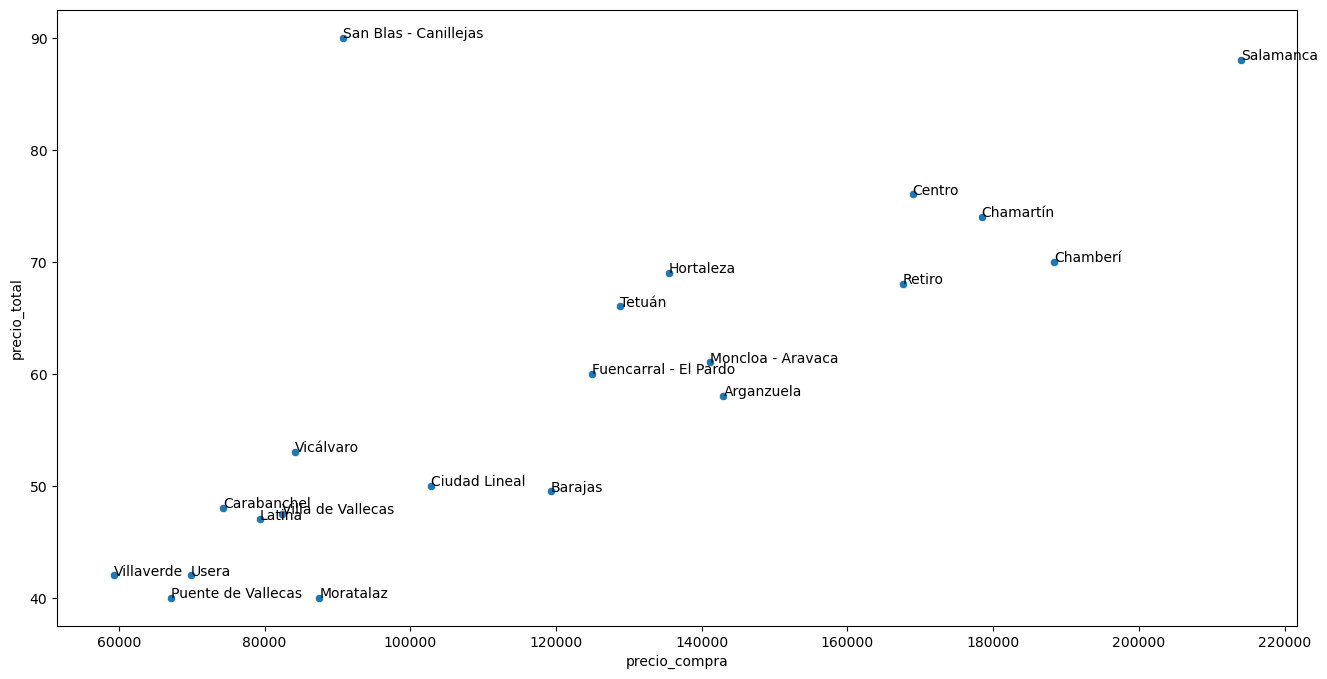

In [9]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'purchase_price', y = 'total_price')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])

Existe una clara correlación entre el precio de compra en cada distrito y el precio que podremos cobrar.

Claramente se perciben tres clusters de bajo-bajo, medio-medio y alto-alto.

Y la excepción de San Blas que ya sabemos por qué es.

Por tanto como era esperable no hay a priori ningún "chollo" claro a este nivel.

Vamos a repetir el análisis a nivel de barrio a ver si identificamos algo.

In [10]:
temp = df.groupby('neighbourhood')[['precio_total','precio_compra']].median()
temp

,precio_total,precio_compra
neighbourhood,,
Abrantes,35.5,74305.0
Acacias,53.8,142975.0
Adelfas,54.0,234612.0
Aeropuerto,41.3,119315.0
Aguilas,47.0,79345.0
...,...,...
Valverde,62.5,124880.0
Ventas,42.0,102900.0
Vinateros,50.0,87500.0


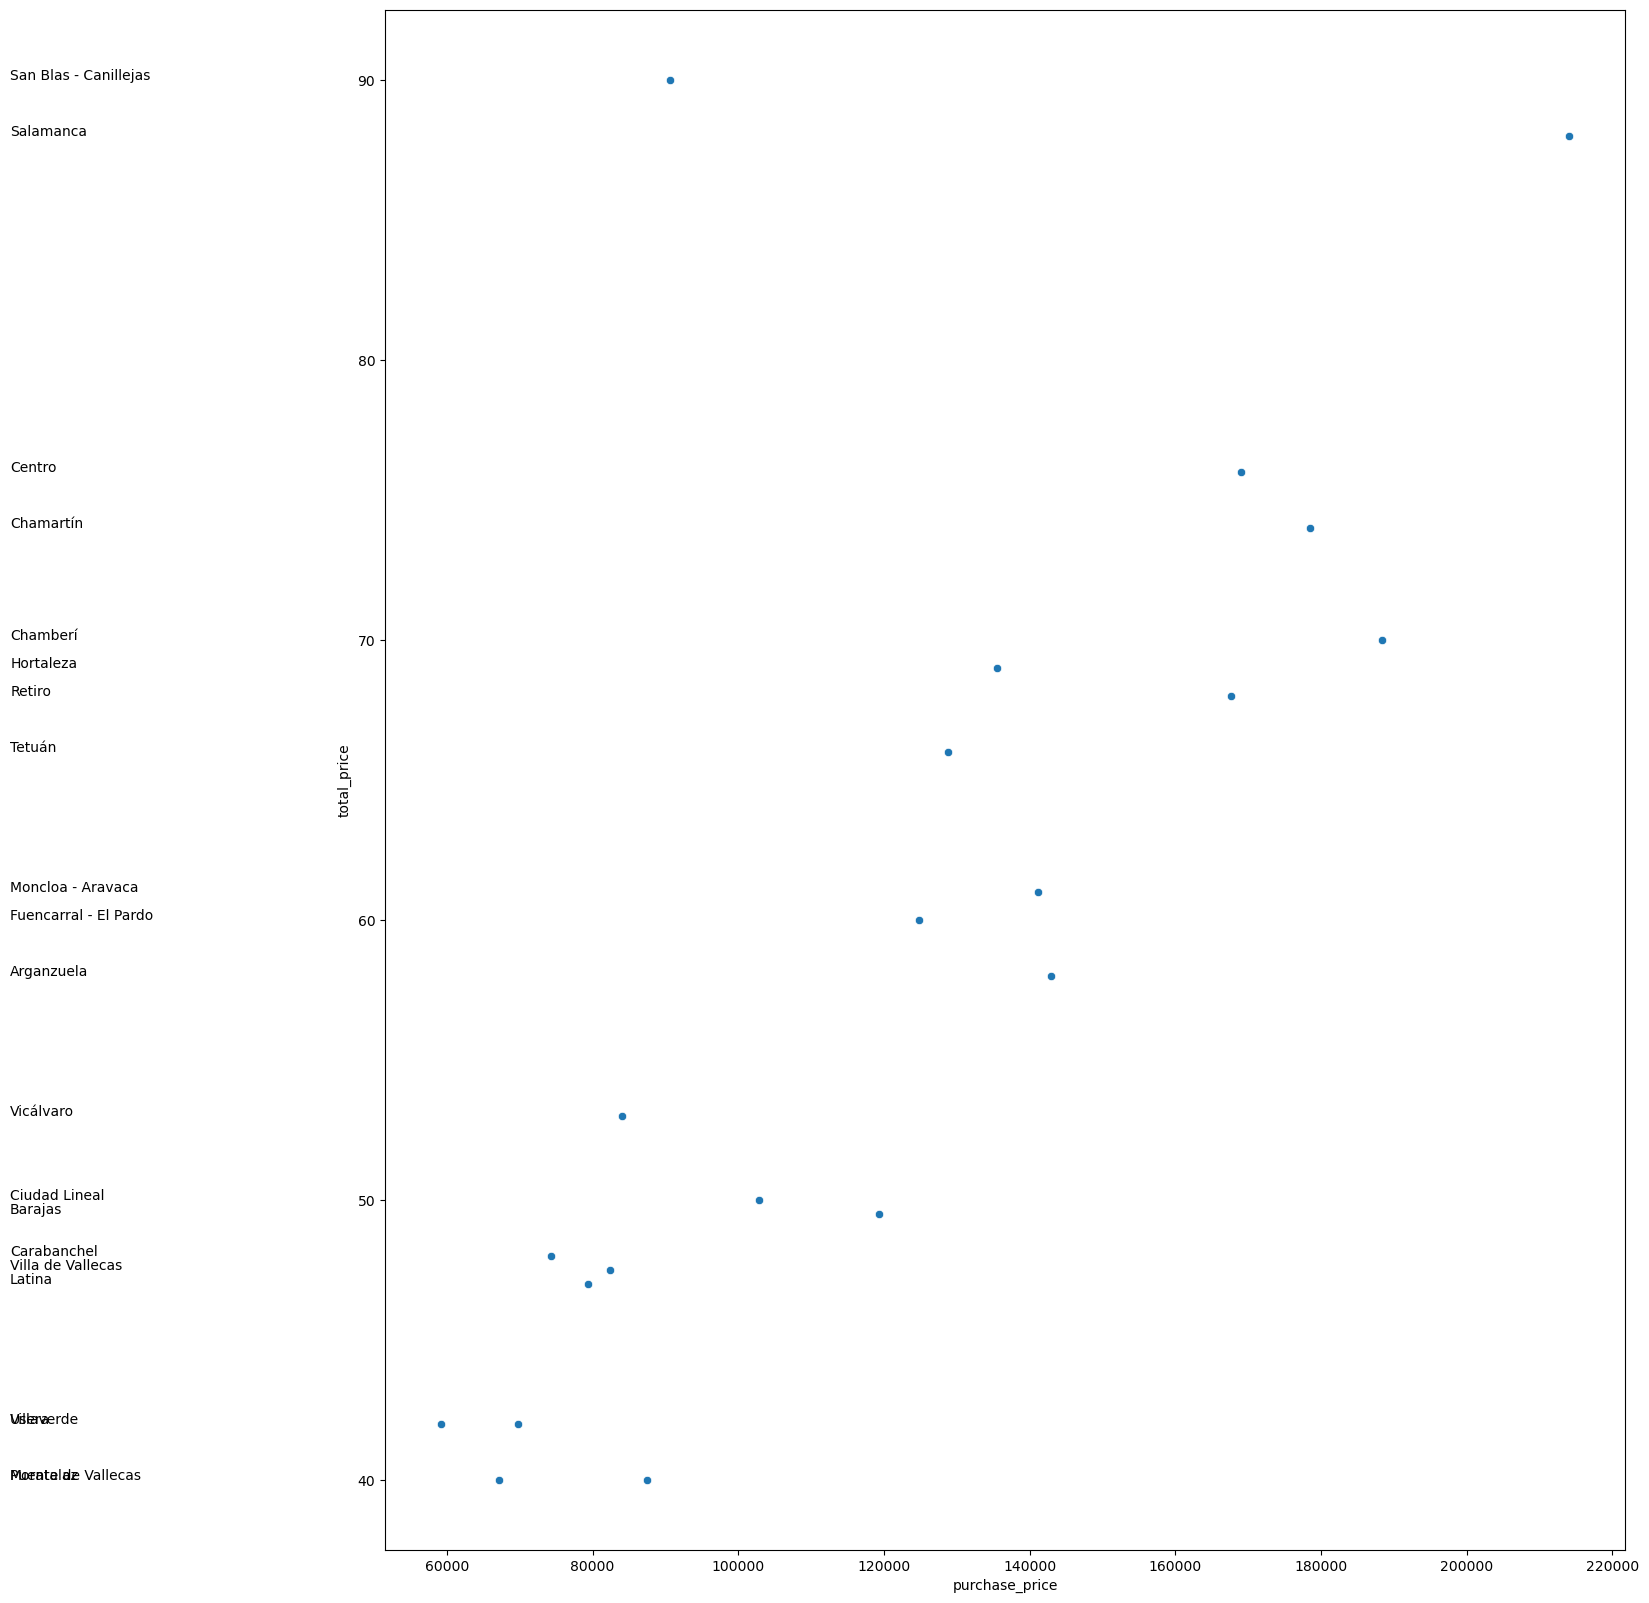

In [8]:
plt.figure(figsize = (16,20))
sns.scatterplot(data = temp, x = 'purchase_price', y = 'total_price')
#Ponemos las etiquetas
for each in range(0,temp.shape[0]):
    plt.text(temp.total_price[each], temp.total_price[each], temp.index[each])

At this level we already see more things:

* 3 neighborhoods that stand out, possibly all 3 are from San Blas
* Within each low-medium-high group, we can begin to separate
     * Low: Simancas, Ambroz, Marroquina, San Juan Bautista
     * Medium: El Plantio, Valdemarín, Valdefuentes
     * Medium-high: Jerónimos, Fuentela Reina
     * High: Recoletos
    
**Insight 2: There are certain neighborhoods that a priori can maximize the cost-income ratio and we can also segment it by the type of quality of the property in which we are interested in investing**

In [9]:
df.loc[df.neighbourhood.isin(['Rosas','Canillejas','Hellin']),'district'].unique()

array(['San Blas - Canillejas'], dtype=object)

**What factors (apart from location determine the rental price?**

To answer this question we can build a minicube, since we have discretized our analysis variables.

In [11]:
#Step 1: Select which variables will be the metrics and which will be the dimensions
metrics = ['total_price', 'purchase_price']
dimensions = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc']

minicube_price = df[dimensions + metrics]
minicube_price

,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,total_price,purchase_price
0,01_One,0-3,1,48-744,60.0,178430.0
1,01_One,0-3,1,5-48,31.0,79345.0
2,03_Three,5-16,3-24,1-4,50.0,257355.0
3,01_One,0-3,1,5-48,92.0,168945.0
4,01_One,0-3,1,48-744,26.0,142975.0
...,...,...,...,...,...,...
17705,01_One,0-3,1,1-4,29.0,168945.0
17706,01_One,0-3,1,1-4,29.0,168945.0
17707,01_One,0-3,1,1-4,29.0,168945.0
17708,01_One,0-3,1,1-4,29.0,213990.0


In [12]:
#Step 2: pass the dimensions to transactional
minicube_price = minicube_price.melt(id_vars=['total_price', 'purchase_price'])
minicube_price

,total_price,purchase_price,variable,value
0,60.0,178430.0,bedrooms_disc,01_One
1,31.0,79345.0,bedrooms_disc,01_One
2,50.0,257355.0,bedrooms_disc,03_Three
3,92.0,168945.0,bedrooms_disc,01_One
4,26.0,142975.0,bedrooms_disc,01_One
...,...,...,...,...
70835,29.0,168945.0,number_of_reviews_disc,1-4
70836,29.0,168945.0,number_of_reviews_disc,1-4
70837,29.0,168945.0,number_of_reviews_disc,1-4
70838,29.0,213990.0,number_of_reviews_disc,1-4


In [13]:
#Paso 3: Agregar las métricas por "variable" y "valor" con las funciones deseadas

minicube_price = minicube_price.groupby(['variable','value'])[['total_price', 'purchase_price']].agg('median')
minicube_price

total_price  purchase_price
variable               value                                       
accommodates_disc      0-3                     50.0        168945.0
                       4                       86.0        168945.0
                       5-16                   126.0        236523.0
bedrooms_disc          01_One                  56.0        168945.0
                       02_Two                 100.0        236523.0
                       03_Three               140.0        304101.0
                       04_Four or more        204.0        405468.0
beds_disc              1                       59.0        168945.0
                       2                      100.0        236523.0
                       3-24                   139.0        257355.0
number_of_reviews_disc 1-4                     70.0        168945.0
                       48-744                  68.0        168945.0
                       5-48                    69.0        168945.0

On the minicube we are analyzing each variable.

In [14]:
minicube_price.loc['bedrooms_disc']

,total_price,purchase_price
value,,
01_One,56.0,168945.0
02_Two,100.0,236523.0
03_Three,140.0,304101.0
04_Four or more,204.0,405468.0


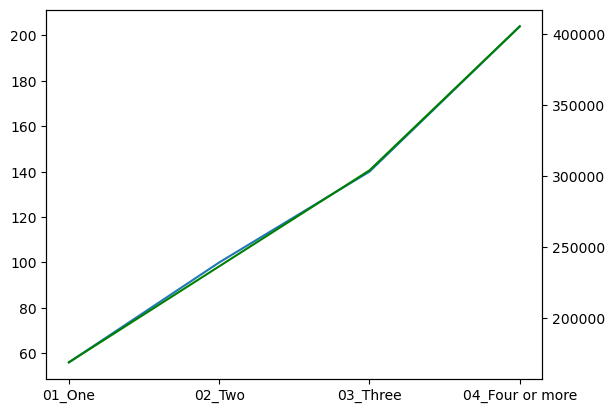

In [15]:
f, ax = plt.subplots()
ax.plot(minicube_price.loc['bedrooms_disc'].total_price)
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['bedrooms_disc'].purchase_price,color = 'green');

Regarding the number of rooms, there is nothing to highlight.

There is an almost perfect relationship between the purchase price and the total price that can be charged.

Part of this effect may be artificial, since we use the number of rooms to calculate the total price as the purchase price.

In [16]:
minicube_price.loc['beds_disc']

,total_price,purchase_price
value,,
1,59.0,168945.0
2,100.0,236523.0
3-24,139.0,257355.0


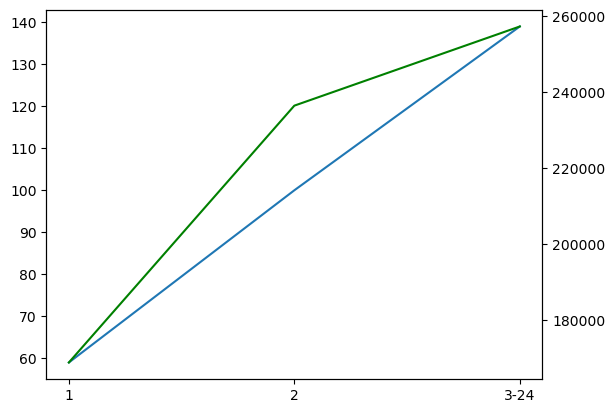

In [18]:
f, ax = plt.subplots()
ax.plot(minicube_price.loc['beds_disc'].total_price)
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['beds_disc'].purchase_price,color = 'green');

Regarding the number of beds, there is a conclusion:

**Insight 3: the number of beds to avoid is 2**. Either we put a bed or we try to fit as many as possible.

Since there was no effect on the number of rooms, could it be that the owners are trying to cram in a lot more beds than rooms to maximize revenue?

Let's see it for example with the floors of a room:

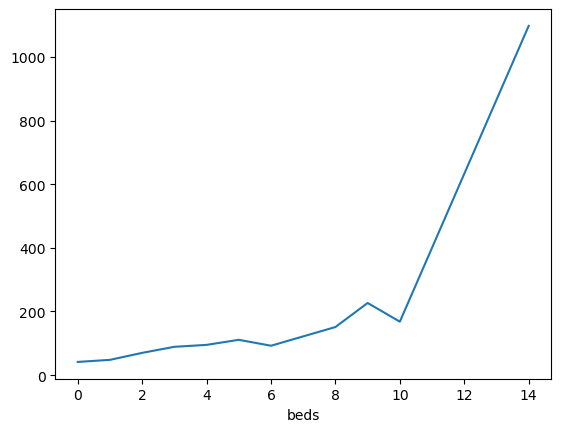

In [19]:
df[df.bedrooms == 1].groupby('beds').total_price.median().plot();

Indeed there is something here, since it appears that for one-room apartments there are people who are putting up to dozens of beds!

It would be a topic to explore in more detail and discuss with someone who knows the business.

Let's see some examples:

In [20]:
df.loc[(df.bedrooms == 1)& (df.beds > 8)]

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2,district,total_price,ocupation,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,purchase_price,poi_sol
357,357,357,1044902,Masía el Ferrajón,5751753,Moncloa - Aravaca,Ciudad Universitaria,40.46549,-3.75115,Private room,112,2,1,0,<b>The space</b><br />Masía el Ferrajón featur...,f,16,1.0,14.0,0,NaN,NaN,NaN,4033,Moncloa - Aravaca,1097.6,100,01_One,5-16,3-24,1-4,50,141155.0,6.767308
605,605,605,2143824,The Hat Madrid - 10 people shared,10940437,Centro,Sol,40.41511,-3.70804,Shared room,24,1,6,364,10 people shared room with shared bathroom. <b...,t,10,1.0,10.0,91,4.57,4.69,4.84,4827,Centro,168.0,0,01_One,5-16,3-24,48-744,50,168945.0,0.436897
710,710,710,3011110,The Hat Madrid-Compartida 10 pers 2,10940437,Centro,Embajadores,40.41311,-3.70621,Shared room,24,1,6,364,The Hat Madrid es el primer Boutique Hostel de...,t,10,1.0,10.0,28,4.56,4.81,4.93,4827,Centro,168.0,0,01_One,5-16,3-24,5-48,50,168945.0,0.470155
11848,11848,11848,39600798,Bed in a 10-Bed Dormitory In the Centre of Madrid,304035848,Centro,Justicia,40.42710,-3.69912,Shared room,20,1,13,351,"Low-key, hostel-style setup on a tree-lined st...",f,1,1.0,10.0,2,5.00,5.00,5.00,4827,Centro,140.0,3,01_One,0-3,3-24,1-4,50,168945.0,1.207701
13340,13340,13340,42492960,Apartamento dúplex 10camas en literas,338384437,Tetuán,Cuatro Caminos,40.44959,-3.70138,Private room,298,1,1,364,Vivienda en planta baja con 10 plazas distribu...,f,10,1.0,10.0,1,5.00,4.00,5.00,3678,Tetuán,2086.0,0,01_One,5-16,3-24,1-4,50,128730.0,3.658902
15722,15722,15722,48855617,"habitaciones en una casa tranquila, en el centro",194738186,Salamanca,Fuente del Berro,40.42604,-3.66373,Private room,36,2,1,359,Es una casa que tiene dos habitaciones que se ...,f,5,1.0,9.0,0,NaN,NaN,NaN,6114,Salamanca,226.8,1,01_One,5-16,3-24,1-4,50,213990.0,3.510206


Let's analyze now by the number of guests they accept

In [21]:
minicube_price.loc['accommodates_disc']

,total_price,purchase_price
value,,
0-3,50.0,168945.0
4,86.0,168945.0
5-16,126.0,236523.0


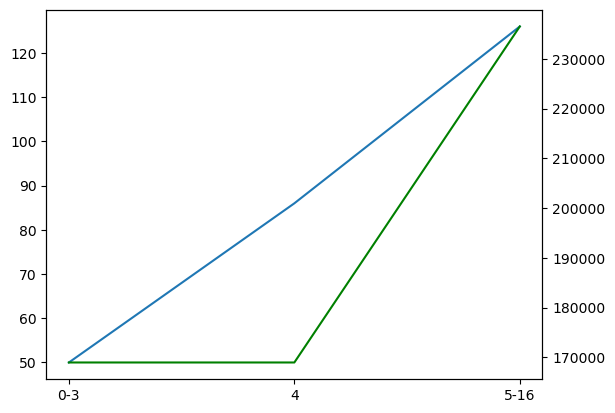

In [22]:
f, ax = plt.subplots()
ax.plot(minicube_price.loc['accommodates_disc'].total_price)
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['accommodates_disc'].purchase_price,color = 'green');

**Insight 4: the optimal number of guests is 3, since the price of the properties to accommodate 3 is the same as to accommodate 1 or 2. From 4 the floor needs to be larger and the purchase price increases a lot **

Finally we are going to analyze the variable that we have built of proximity to a point of interest to see if it has an effect on the price of the rooms.

In this case, as we have built the distance to Puerta del Sol, we are going to evaluate only the districts for which this may be relevant, that is, the most central ones.

To do this, we will first calculate the average distance per district and choose a cut-off point.

In [23]:
df.groupby('district').poi_sol.median().sort_values()

district
Centro                    0.728581
Arganzuela                1.817840
Chamberí                  2.078790
Moncloa - Aravaca         2.130135
Retiro                    2.415432
Salamanca                 2.705209
Latina                    3.496952
Carabanchel               3.647956
Usera                     3.661376
Chamartín                 4.233216
Puente de Vallecas        4.233631
Tetuán                    4.572866
Ciudad Lineal             5.170226
Moratalaz                 5.242395
Villaverde                7.579665
Fuencarral - El Pardo     7.738933
San Blas - Canillejas     7.962141
Hortaleza                 8.132864
Vicálvaro                 8.396723
Villa de Vallecas         8.822907
Barajas                  11.593340
Name: poi_sol, dtype: float64

Let's cut in Latina included.

And on that selection we are going to visualize with a scatter.

In [24]:
df.groupby('district').poi_sol.median().sort_values()[0:7].index.to_list()

['Centro',
 'Arganzuela',
 'Chamberí',
 'Moncloa - Aravaca',
 'Retiro',
 'Salamanca',
 'Latina']

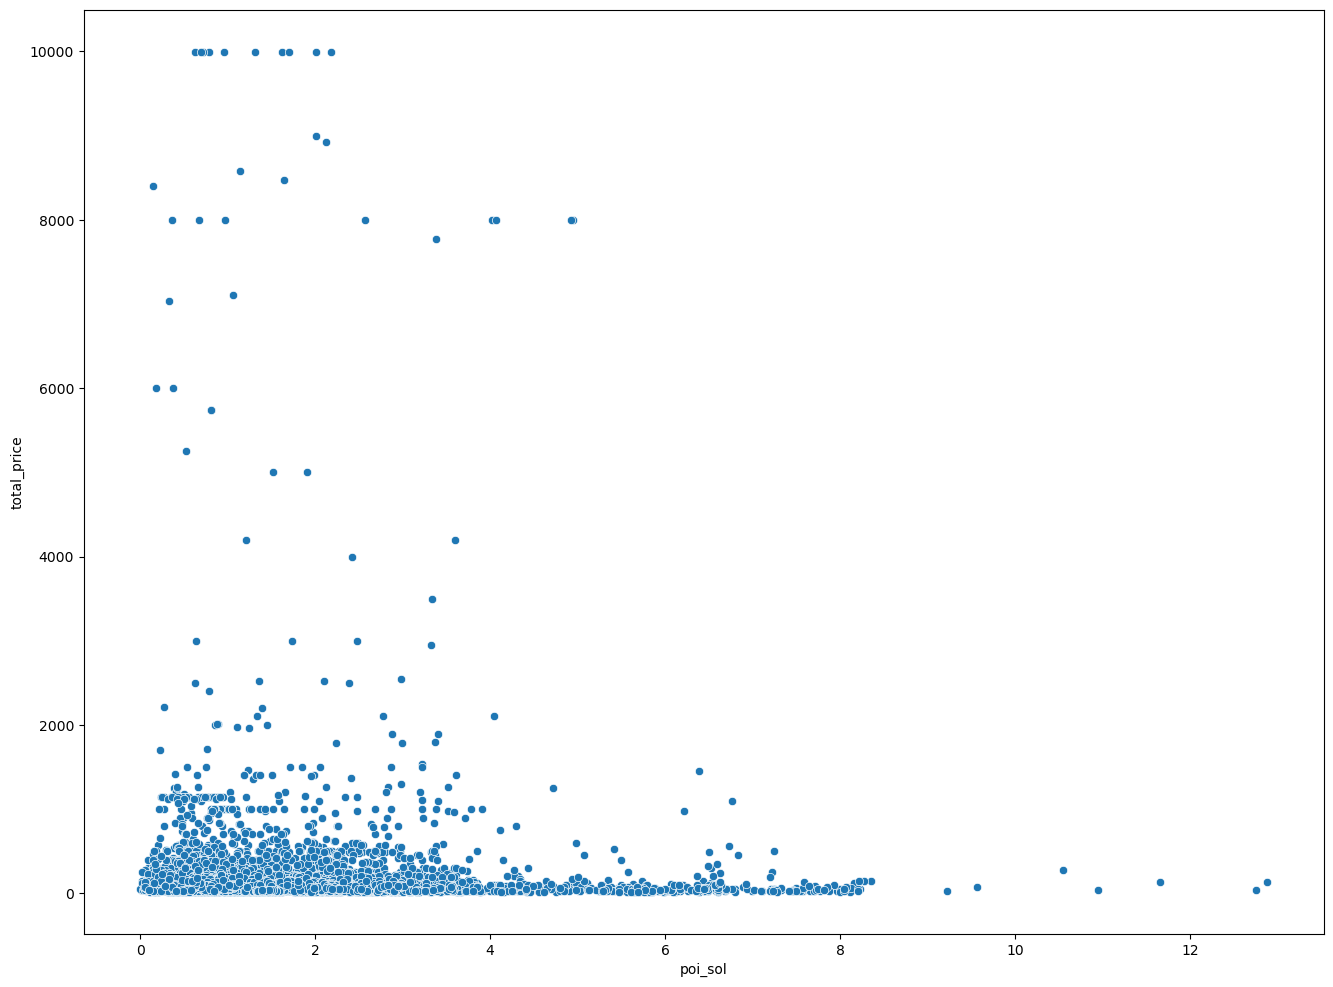

In [25]:
selection = df.groupby('district').poi_sol.median().sort_values()[0:7].index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df.district.isin(selection)], x = 'poi_sol', y = 'total_price');

There does not seem to be as direct a relationship as would be expected between the distance to Puerta del Sol and the rental price.

**Insight 5: being within the district it seems that the proximity to points of interest does not have as much impact as would be expected. This opens the door to looking for properties that, being in a central district, are not right next to the PoI and therefore hopefully have a lower purchase price**

### Geographic analysis on a map

Geographical analysis is a discipline in itself and quite complex.

But luckily there is an alternative in Python that makes it very simple and covers everything we need practically for our purpose.

It is a package called Folium and it is an implementation of the Leaflet technology in Python.

The only thing we need to use it is to have the latitude and longitude coordinates.

**Install:**

conda install -c conda-forge folium

**Import:**

import folium

**Documentation:**

https://python-visualization.github.io/folium/index.html

In [26]:
import folium

With folium it is not necessary to install maps, it already comes by default, all we have to do to initialize a map is pass it the start coordinates and optionally a zoom level.

We are going to use the coordinates of the Puerta del Sol that we already had.

In [27]:
folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

For example, we are going to visually analyze the insight on the San Blas district.

In [28]:
data = df[df.district == 'San Blas - Canillejas'].copy()

To represent the markers of all the floors we have to create a loop to add them to the map.

In [30]:
madrid_map = folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

for apartment in range(0,len(data)):
   folium.Marker(
      location = [data.iloc[apartment]['latitude'], data.iloc[apartment]['longitude']],
      popup = data.iloc[apartment]['total_price'],
   ).add_to(madrid_map)

madrid_map

This representation is fine, but we have to click on each one to see the price.

It would be easier if we had a color code that visually indicated the price range.

To do this we are going to create a new discretized variable and change the marker to a colored circle.

In [31]:
data['total_price_disc'] = pd.qcut(data['total_price'], q = [0, .25, .5, .75, 1.], 
                              labels=['yellow', 'orange', 'blue', 'red'])

In [32]:
madrid_map = folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

for apartment in range(0,len(data)):
   folium.CircleMarker(
      location = [data.iloc[apartment]['latitude'], data.iloc[apartment]['longitude']],
      popup = data.iloc[apartment]['total_price'],
      fill=True,
      color = data.iloc[apartment]['total_price_disc'],
      fill_opacity=1,
      radius = 5
   ).add_to(madrid_map)

madrid_map

**Insight 6: There are still many yellow and orange dots, which may indicate that there is still potential to further exploit the factor of sporting events**